In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import seaborn as sns
import os

In [2]:
genes= pd.read_table("genes.txt",sep=',')
features= pd.read_table("features.txt",sep='\t',header=None)

## assign feature sets

In [158]:
G_atac = np.load('G_atac.npy')
G_gene = np.load('G_gene.npy')

In [164]:
col_labels_ = np.argmax(G_atac.T, axis =0).tolist()

In [165]:
features[['cluster']]=pd.DataFrame(col_labels_)

In [167]:
group = features.groupby("cluster")

In [168]:
path = './peaksets/' # txt文件路径
for i in range(len(np.unique(col_labels_))):
    geneset = group.get_group(i)[[0,1,2]]
    file_name = str(i)+ '.txt'
    geneset.to_csv(path +file_name,sep='\t', header=False, index=False)

# downstream analysis

## 1. association matrices visualization

In [9]:
S_atac = np.load('./S_atac.npy')
S_gene = np.load('./S_gene.npy')

In [10]:
S_atac=normalize(S_atac, axis=0, norm='max')
S_gene=normalize(S_gene, axis=0, norm='max')

In [11]:
S_atac =pd.DataFrame(S_atac)
S_gene =pd.DataFrame(S_gene)

In [5]:
import colorcet as cc
color_list = sns.color_palette(cc.glasbey, n_colors=15)

In [6]:
cell_ann=["NK cell","CD4 Naive","CD4 Naive","CD8 naive",
          "CD8 naive","CD8 naive","CD16+ Monocytes","Dendritic cell",
          "B cell progenitor","pre-B cell","B cell progenitor",
          "CD4 Naive","CD4 Memory","CD4 Memory","NK cell","Double negative T cell","CD8 effector","PDC","B cell progenitor","CD16+ Monocytes","CD14+ Monocytes"]

In [7]:
rank=[12,13,3,4,5,1,2,11,0,14,15,16,8,10,18,9,17,7,20,6,19]

In [8]:
cell_ann=np.array(cell_ann)

In [10]:
cell_ann=cell_ann[rank]

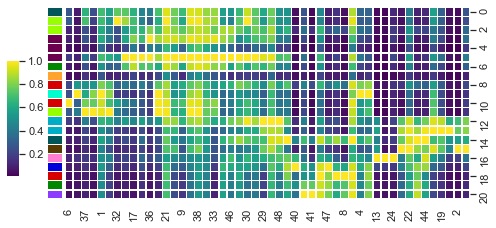

In [82]:
cg = sns.clustermap(pd.DataFrame(S_atac),row_cluster=False,col_cluster=True,figsize=(8, 4), metric='correlation',row_colors=row_colors
,cbar_pos=(0.14, .2, .02, .4),linewidths=0.3,cmap='viridis')
cg.ax_row_dendrogram.set_visible(False) 
cg.ax_col_dendrogram.set_visible(False)


#plt.savefig("./S_atac.png", dpi=750, bbox_inches = 'tight')

In [ ]:
atac_ri=cg.dendrogram_col.reordered_ind
S_atac_ = np.array(S_atac)
S_atac_=S_atac_[:,rna_ri]
S_atac_ =pd.DataFrame(S_atac_)
S_atac_ = S_atac_.applymap(lambda x: 1 if x > 0.9 else 0)
S_atac_.index=rank
S_atac_.columns = atac_ri

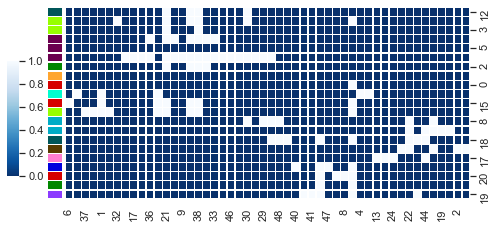

In [89]:
cg = sns.clustermap(pd.DataFrame(S_atac_),row_cluster=False,col_cluster=False,figsize=(8, 4), metric='correlation',row_colors=row_colors
,cbar_pos=(0.14, .2, .02, .4),cmap='Blues_r',linewidths=0.3)
cg.ax_row_dendrogram.set_visible(False) 
cg.ax_col_dendrogram.set_visible(False)

#plt.title('S-atac', fontsize=50,x=15,y=1.5)
plt.savefig("./S_atac_b.png", dpi=750, bbox_inches = 'tight')

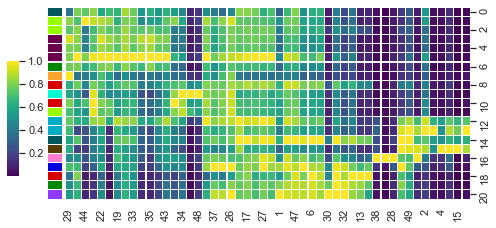

In [71]:
cg=sns.clustermap(pd.DataFrame(S_gene),row_cluster=False,col_cluster=True,figsize=(8, 4), metric='correlation',row_colors=row_colors
,cbar_pos=(0.14, .2, .02, .4),cmap='viridis',linewidths=0.1)
cg.ax_row_dendrogram.set_visible(False) 
cg.ax_col_dendrogram.set_visible(False)

#plt.savefig("./S_gene.png", dpi=750, bbox_inches = 'tight')

In [72]:
rna_ri=cg.dendrogram_col.reordered_ind
S_gene_ = np.array(S_gene)
S_gene_=S_gene_[:,rna_ri]
S_gene_ =pd.DataFrame(S_gene_)
S_gene_ = S_gene_.applymap(lambda x: 1 if x > 0.9 else 0)
S_gene_.index=rank
S_gene_.columns = rna_ri

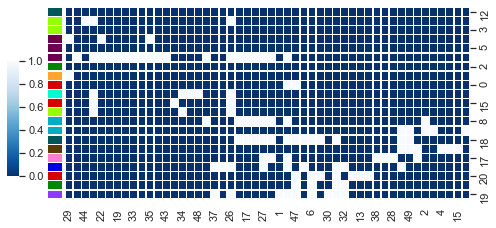

In [73]:
cg = sns.clustermap(pd.DataFrame(S_gene_),row_cluster=False,col_cluster=False,figsize=(8, 4), metric='correlation',row_colors=row_colors
,cbar_pos=(0.14, .2, .02, .4),cmap='Blues_r',linewidths=0.3)
cg.ax_row_dendrogram.set_visible(False) 
cg.ax_col_dendrogram.set_visible(False)

#plt.title('S-atac', fontsize=50,x=15,y=1.5)
plt.savefig("./S_gene_b.png", dpi=750, bbox_inches = 'tight')

# 2. signature gene sets visualization

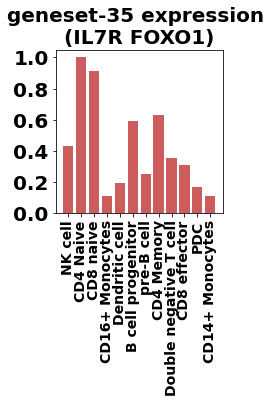

In [14]:
x=cell_ann
y = S_gene[[35]].T.values[0]
plt.xticks(rotation=90)
g=plt.bar(x, y, color='indianred')
#plt.xlabel('celltype', fontsize=30)
#plt.ylabel('norlized ', fontsize=30)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=14,weight='bold')
plt.title('geneset-35 expression \n(IL7R FOXO1)', fontsize=20,weight='bold')
plt.savefig("./35.png", dpi=750, bbox_inches = 'tight')

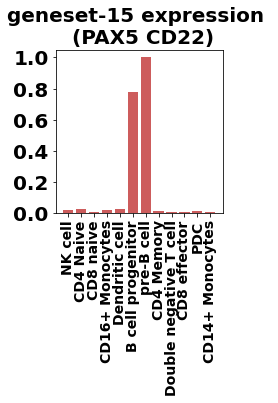

In [42]:
x=cell_ann
y = S_gene[[15]].T.values[0]
plt.xticks(rotation=90)
g=plt.bar(x, y, color='indianred')
#plt.xlabel('celltype', fontsize=30)
#plt.ylabel('norlized ', fontsize=30)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=14,weight='bold')
plt.title('geneset-15 expression \n (PAX5 CD22)', fontsize=20,weight='bold')
plt.savefig("./15.png", dpi=750, bbox_inches = 'tight')

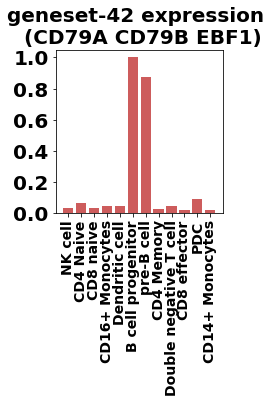

In [43]:
x=cell_ann
y = S_gene[[42]].T.values[0]
plt.xticks(rotation=90)
g=plt.bar(x, y, color='indianred')
#plt.xlabel('celltype', fontsize=30)
#plt.ylabel('norlized ', fontsize=30)
plt.yticks(fontsize=20,weight='bold')
plt.xticks(fontsize=14,weight='bold')
plt.title('geneset-42 expression \n (CD79A CD79B EBF1)', fontsize=20,weight='bold')
plt.savefig("./42.png", dpi=750, bbox_inches = 'tight')

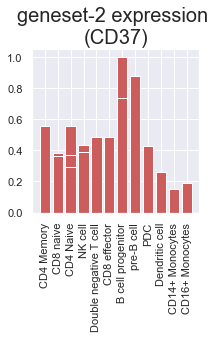

In [326]:
x=cell_ann
y = S_gene[[2]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)

plt.bar(x, y, color='indianred')
plt.title('geneset-2 expression \n(CD37)', fontsize=20)
plt.savefig("./2.png", dpi=750, bbox_inches = 'tight')

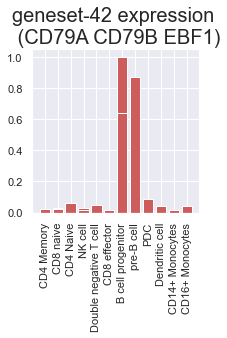

In [327]:
x=cell_ann
y = S_gene[[42]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('geneset-42 expression \n (CD79A CD79B EBF1)', fontsize=20)
plt.savefig("./42.png", dpi=750, bbox_inches = 'tight')

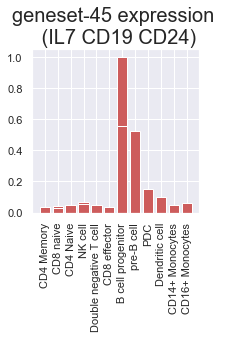

In [328]:
x=cell_ann
y = S_gene[[45]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('geneset-45 expression \n (IL7 CD19 CD24)', fontsize=20)
plt.savefig("./45.png", dpi=750, bbox_inches = 'tight')

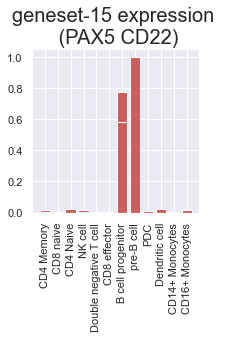

In [329]:
x=cell_ann
y = S_gene[[15]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('geneset-15 expression \n (PAX5 CD22)', fontsize=20)
plt.savefig("./15.png", dpi=750, bbox_inches = 'tight')

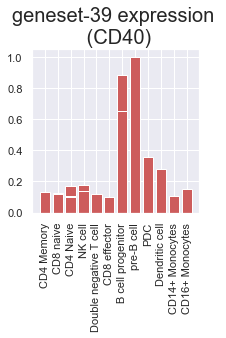

In [330]:
x=cell_ann
y = S_gene[[39]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('geneset-39 expression \n (CD40)', fontsize=20)
plt.savefig("./39.png", dpi=750, bbox_inches = 'tight')

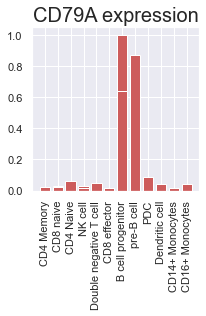

In [316]:
x=cell_ann
y = S_gene[[42]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('CD79A expression', fontsize=20)
plt.savefig("./CD79A.png", dpi=750, bbox_inches = 'tight')

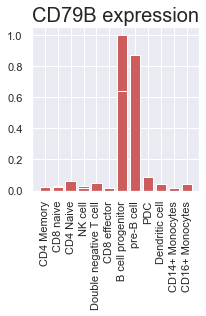

In [317]:
x=cell_ann
y = S_gene[[42]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('CD79B expression', fontsize=20)
plt.savefig("./CD79B.png", dpi=750, bbox_inches = 'tight')

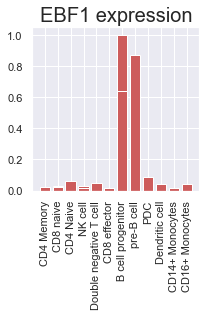

In [318]:
x=cell_ann
y = S_gene[[42]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y, color='indianred')
plt.title('EBF1 expression', fontsize=20)
plt.savefig("./EBF1.png", dpi=750, bbox_inches = 'tight')

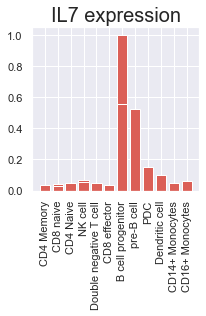

In [304]:
x=cell_ann
y = S_gene[[45]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('IL7 expression', fontsize=20)
plt.savefig("./IL7.png", dpi=750, bbox_inches = 'tight')

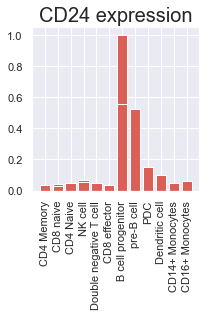

In [292]:
x=cell_ann
y = S_gene[[45]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('CD24 expression', fontsize=20)
plt.savefig("./CD24.png", dpi=750, bbox_inches = 'tight')

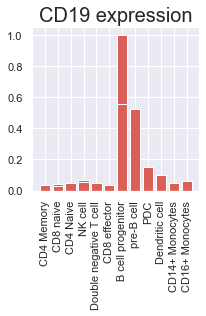

In [293]:
x=cell_ann
y = S_gene[[45]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('CD19 expression', fontsize=20)
plt.savefig("./CD19.png", dpi=750, bbox_inches = 'tight')

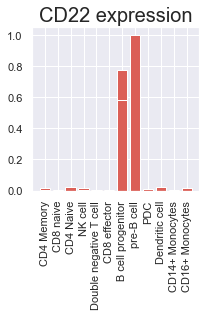

In [294]:
x=cell_ann
y = S_gene[[15]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('CD22 expression', fontsize=20)
plt.savefig("./CD22.png", dpi=750, bbox_inches = 'tight')

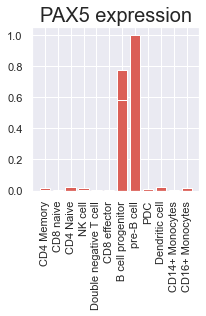

In [297]:
x=cell_ann
y = S_gene[[15]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('PAX5 expression', fontsize=20)
plt.savefig("./PAX5.png", dpi=750, bbox_inches = 'tight')

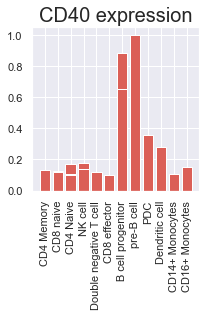

In [295]:
x=cell_ann
y = S_gene[[39]].T.values[0]
plt.xticks(rotation=90)
ax.set_xlabel('celltype', fontsize=30)
ax.set_ylabel('expressin', fontsize=30)
plt.bar(x, y)
plt.title('CD40 expression', fontsize=20)
plt.savefig("./CD40.png", dpi=750, bbox_inches = 'tight')

# 3. correlation matrix and PEGS validation

In [172]:
def np_pearson_cor(x, y):
    xv = x - x.mean(axis=0)
    yv = y - y.mean(axis=0)
    xvss = (xv * xv).sum(axis=0)
    yvss = (yv * yv).sum(axis=0)
    result = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))
    # bound the values to -1 to 1 in the event of precision issues
    return np.maximum(np.minimum(result, 1.0), -1.0)

In [195]:
I = np_pearson_cor(S_atac,S_gene)

<ipython-input-172-29b1f1091d97>:6: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  result = np.matmul(xv.transpose(), yv) / np.sqrt(np.outer(xvss, yvss))


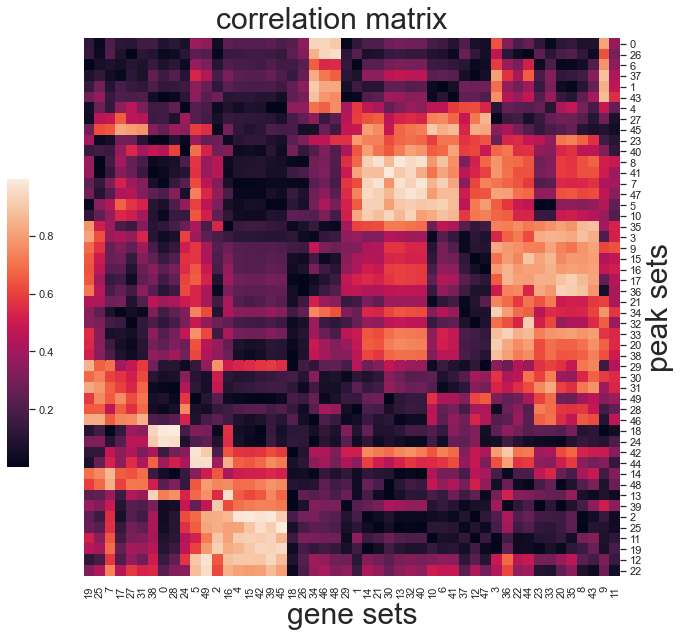

In [305]:
sns.set(font_scale=1)
g=sns.clustermap(pd.DataFrame(np.abs(I)),figsize=(10, 10),
    cbar_pos=(0.1, .2, .03, .4), metric='correlation',yticklabels=True,xticklabels=True)
ax = g.ax_heatmap
g.ax_row_dendrogram.set_visible(False) 
g.ax_col_dendrogram.set_visible(False)
ax.set_xlabel('gene sets', fontsize=30)
ax.set_ylabel('peak sets', fontsize=30)
plt.title('correlation matrix', fontsize=30,x=15,y=1.5)
plt.savefig("./pearson.png", dpi=750, bbox_inches = 'tight')

In [199]:
pegs = pd.read_csv("./pegs_pval.tsv",sep='\t',header=None)
pegs=pegs.drop([0,1],axis=1)
pegs =np.array(pegs)
pegs=pegs[atac_ri,:]
pegs=pegs[:,rna_ri]

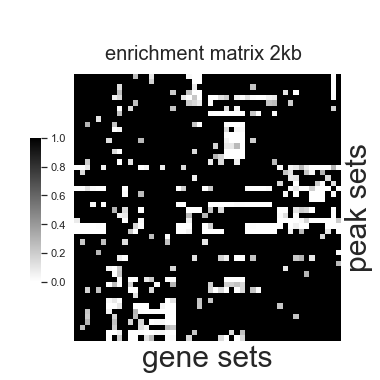

In [209]:
g =sns.clustermap(pd.DataFrame(pegs),figsize=(5,5),
    cbar_pos=(0.1, .2, .03, .4), cmap="binary",row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False)
ax = g.ax_heatmap
ax.set_xlabel('gene sets', fontsize=30)
ax.set_ylabel('peak sets', fontsize=30)
plt.title('enrichment matrix 2kb', fontsize=20,x=16,y=1.5)
plt.savefig("./log_p_reordered.png", dpi=750, bbox_inches = 'tight')

exploying thresholds

In [207]:
atac_ri =g.dendrogram_row.reordered_ind
rna_ri=g.dendrogram_col.reordered_ind
II =np.array(np.abs(I))
II=II[atac_ri,:]
II=II[:,rna_ri]

In [220]:
II[II>=0.8]=1
II[II<0.8]=0

Text(15, 1.5, 'correlation matrix')

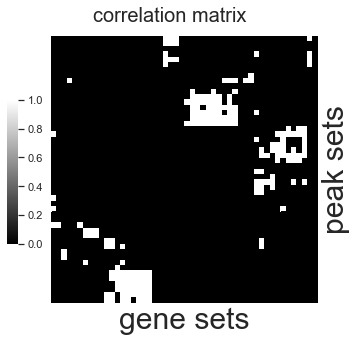

In [223]:
sns.set(font_scale=1)
g=sns.clustermap(pd.DataFrame(II),figsize=(5, 5),
    cbar_pos=(0.1, .2, .03, .4), metric='correlation',yticklabels=False,xticklabels=False,row_cluster=False,col_cluster=False, cmap="binary_r")
ax = g.ax_heatmap
g.ax_row_dendrogram.set_visible(False) 
g.ax_col_dendrogram.set_visible(False)
ax.set_xlabel('gene sets', fontsize=30)
ax.set_ylabel('peak sets', fontsize=30)
plt.title('correlation matrix', fontsize=20,x=15,y=1.5)